In [1]:
# SH-I

In [4]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import pickle

In [5]:
data = pd.read_csv('rfu_norm.csv')
data = data.round(decimals = 4)

monomers = ['Fuc', 'GalNAc', 'Gal', 'GlcNAc', 'Glc', 'KDN', 'Man', 'Neu5,9Ac',
            'Neu5Ac', 'Neu5Gc']
link_type = ['a', 'b']
link_pos = ['1-2', '1-3', '1-4', '1-5', '2-3', '2-6', '-']
linkages = ['Sp0', 'Sp8', 'Sp9', 'Sp10', 'Sp11', 'Sp12', 'Sp13', 'Sp14', 'Sp15',
            'Sp16', 'Sp17', 'Sp18', 'Sp19', 'Sp20', 'Sp21', 'Sp22', 'Sp23',
            'Sp24', 'Sp25', 'MDPLys']

units = [x + y + z for x, y, z in list(itertools.product(monomers, link_type, link_pos))]

In [6]:
def vectorized_result(i):
    
    upper = 0.6
    lower = 0.2

    e = np.zeros((3, 1))

    if upper <= i:

        e[0] = 1.0

    elif lower <= i < upper:

        e[1] = 1.0

    elif i < lower:

        e[2] = 1.0

    return e

In [5]:
def counter(glycan):

    count_list = []

    for unit in units + linkages:

        n = glycan.count(unit)

        count_list.append(n)

    return np.array(count_list, dtype = float).reshape((-1, 1))

In [6]:
def load_data(split):

    input_data = list(data['Structure on Masterlist'].apply(counter))
    output_data = list(data['MpL-1 (10ug/ml)'].apply(vectorized_result))

    training_data = zip(input_data[:split], output_data[:split])
    test_data = zip(input_data[split:], output_data[split:])

    return (training_data, test_data)

In [66]:
x, y = (np.array([[0.00307205],
       [0.00684805],
       [0.9999471 ]]), np.array([[0.],
       [0.],
       [1.]]))

In [24]:
def heat(x, y):

    plt.subplot(1, 2, 1)
    plt.imshow(x, cmap = 'Blues')
    plt.title('output')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(y, cmap = 'Blues')
    plt.title('desired output')
    plt.axis('off')

    plt.show()

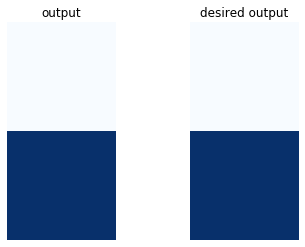

In [25]:
heat(x, y)

In [26]:
test = [(np.array([[0], [1]]), np.array([[0], [1]])), (np.array([[0], [1]]), np.array([[0], [1]]))]

In [27]:
# save
with open('array.pkl', 'wb') as f:
    
    pickle.dump(test, f)

In [28]:
# load
with open('array.pkl', 'rb') as f:
    
    mynewlist = pickle.load(f)